In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7416794419464873522
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 22729785344
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17053376926555214618
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [ ]:
# Using 3D array with LSTM
 
from keras import Model
from keras.layers import Input, Dense, Bidirectional
from keras.layers.recurrent import LSTM
import numpy as np


# define model for simple BI-LSTM + DNN based binary classifier
def define_model():
    input1 = Input(shape=(2,2)) #use row and column size as input size
    lstm1 = Bidirectional(LSTM(units=32))(input1)
    dnn_hidden_layer1 = Dense(3, activation='relu')(lstm1)
    dnn_output = Dense(1, activation='sigmoid')(dnn_hidden_layer1)
    model = Model(inputs=[input1],outputs=[dnn_output])
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam')#, metrics=['accuracy']
    model.summary()
    return model
# Take a dummy 3D numpy array to train the model
data = np.array([[[0.1, 0.15], [0.2, 0.25]],
                 [[0.3, 0.35], [0.4, 0.45]],
                 [[0.5, 0.55], [0.6, 0.65]],
                 [[0.7, 0.75], [0.8, 0.85]],
                 [[0.9, 0.95], [1.0, 1.5]]])
Y = [1,1,1,0,0] #define binary class level for this model
print("data = ", data)
# NO NEED TO RESHAPE THE DATA as it is already in 3D format
# Call the model
model = define_model()
# Fit the model
model.fit([data],[np.array(Y)],epochs=4,batch_size=2,verbose=1)
# Take a test data to test the working of the model
test_data = np.array([[[0.2, 0.33],[0.2, 0.33]]])
# predict the sigmoid output [0,1] for the 'test_data'
pred = model.predict(test_data)
print("predicted sigmoid output => ",pred)

In [3]:
test_data

array([[[0.2 , 0.33],
        [0.2 , 0.33]]])

In [ ]:
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

17473536/17464789 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Download and load the dataset.
fpath = keras.utils.get_file(
    "moving_mnist.npy",
    "http://www.cs.toronto.edu/~nitish/unsupervised_video/mnist_test_seq.npy",
)
dataset = np.load(fpath)

# Swap the axes representing the number of frames and number of data samples.
dataset = np.swapaxes(dataset, 0, 1)
# We'll pick out 1000 of the 10000 total examples and use those.
dataset = dataset[:1000, ...]
# Add a channel dimension since the images are grayscale.
dataset = np.expand_dims(dataset, axis=-1)

# Split into train and validation sets using indexing to optimize memory.
indexes = np.arange(dataset.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.9 * dataset.shape[0])]
val_index = indexes[int(0.9 * dataset.shape[0]) :]
train_dataset = dataset[train_index]
val_dataset = dataset[val_index]

# Normalize the data to the 0-1 range.
train_dataset = train_dataset / 255
val_dataset = val_dataset / 255

# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y


# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

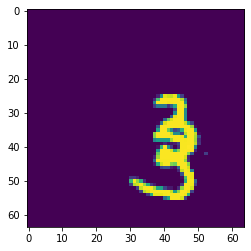

In [23]:
plt.imshow(train_dataset[data_choice][0])

In [71]:
x_train.shape

(900, 19, 64, 64, 1)

In [70]:
x_train_new.shape

(10, 4, 64, 64, 1)

In [45]:
x_train_new = np.array([i[:4] for i in x_train[:10]])
y_train_new = np.array([i[:4] for i in y_train[:10]])

In [1]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

NameError: name 'layers' is not defined

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 2
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr],
)#    validation_data=(x_val, y_val),

Epoch 1/2


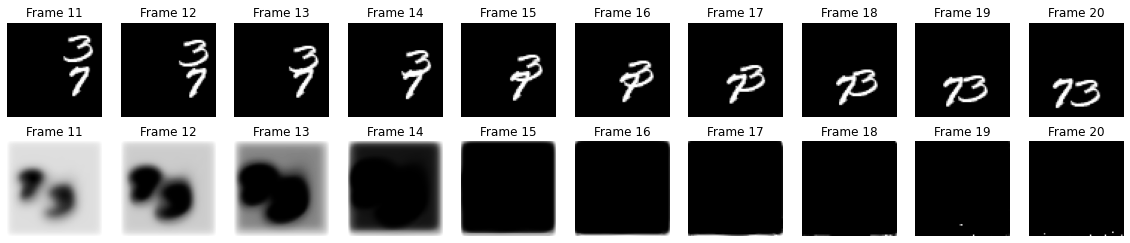

In [77]:
# Select a random example from the validation dataset.
example = val_dataset[np.random.choice(range(len(val_dataset)), size=1)[0]]

# Pick the first/last ten frames from the example.
frames = example[:10, ...]
original_frames = example[10:, ...]

# Predict a new set of 10 frames.
for _ in range(10):
    # Extract the model's prediction and post-process it.
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames.
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Plot the new frames.
new_frames = frames[10:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Display the figure.
plt.show()

In [73]:
import numpy as np

def makeGaussian(size, fwhm = 10, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

In [74]:
from scipy.ndimage import gaussian_filter
def process_img(input_img):
    img = input_img.reshape(100,100)
    img_p = ((img)- np.mean((img).flatten()))/np.std((img).flatten())
    img_p[img_p<0]= 0
    return img_p.reshape(100,100,1)

In [75]:
left_up = makeGaussian(100,fwhm = 10,center=(10,10))
center = makeGaussian(100,fwhm = 10,center=(32,32))


In [76]:
blank = np.asarray([np.zeros((64,64)),np.zeros((64,64)),np.zeros((64,64)),np.zeros((64,64))])

In [85]:
dot_sets = []
ground_truth = []

for pos in np.arange(100):
    dot_sets_hyb = []
    ground_truth_hyb = []
    
    #two real dot positions
    x_1,y_1 = np.random.random()*100, np.random.random()*100
    x_2,y_2 = np.random.random()*100, np.random.random()*100
    
    real_1 = makeGaussian(100,fwhm = 4,center=(x_1,y_1))
    real_2 = makeGaussian(100,fwhm = 4,center=(x_2,y_2))
    
    for hyb in np.arange(4):
        #Add two real dots and one fake one
        base_im = real_1 + real_2
        for f in np.arange(20):
            base_im = base_im+makeGaussian(100,fwhm = 4,center=(np.random.random()*100,np.random.random()*100))
        dot_sets_hyb.append(base_im)
        ground_truth_hyb.append(real_1 + real_2)
        
    dot_sets.append(dot_sets_hyb)
    ground_truth.append(ground_truth_hyb)
        
        

In [86]:
 
from keras import Model
from keras.layers import Input, Dense, Bidirectional
from keras.layers.recurrent import LSTM
import numpy as np

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
#import imageio
from IPython.display import Image, display
#from ipywidgets import widgets, Layout, HBox

In [87]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17044345125816462868
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14486202502132898532
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [88]:
np.asarray(dot_sets).shape

(100, 4, 100, 100)

In [89]:
dot_sets = np.asarray(dot_sets).reshape((100,4,100,100,1))
ground_truth = np.asarray(ground_truth).reshape((100,4,100,100,1))

In [90]:
dot_sets[0].shape

(4, 100, 100, 1)

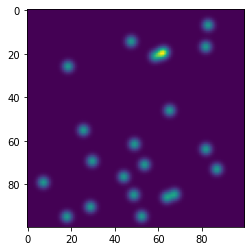

In [91]:
plt.imshow(dot_sets[1][2])

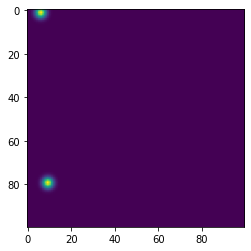

In [92]:
plt.imshow(ground_truth[50][0])

In [28]:
x_train, y_train = dot_sets[:4000],ground_truth[:4000]
x_val, y_val = dot_sets[4000:],ground_truth[4000:]

In [61]:
x_train.shape

(4000, 4, 100, 100, 1)

In [6]:
def imshow(data):
    u = np.mean(data)
    sd = np.std(data)
    plt.imshow(data,cmap='gray',vmin=u-(2*sd), vmax=u+(3*sd))

In [13]:
data = np.load('train/data-150.npy')

In [14]:
def tile_img(raw_input):
    img_stack = np.asarray([np.hsplit(i,20) for i in np.vsplit(raw_input[:2000,:2000], 20)])
    img_stacks = []
    for i in np.arange(20):
        for j in np.arange(20):
            img_stacks.append(img_stack[i][j])

    return img_stacks


In [15]:
all_gene_combos = []
for gene_combo in data:
    re_gene_combo = []
    for barcoding_round in gene_combo:
        barcoding_round_elongated = []
        
        imgs = tile_img(barcoding_round)
        
        [barcoding_round_elongated.append(i) for i in imgs]
        re_gene_combo.append(barcoding_round_elongated)
        
    all_gene_combos.append(np.asarray(re_gene_combo).swapaxes(0,1))

ValueError: array split does not result in an equal division

In [10]:
del data

In [11]:
all_gene_combos = np.asarray(all_gene_combos)
all_gene_combos = all_gene_combos.reshape(all_gene_combos.shape[0]*all_gene_combos.shape[1],5,100,100)

NameError: name 'all_gene_combos' is not defined

In [12]:
all_gene_combos.shape

NameError: name 'all_gene_combos' is not defined

In [12]:
indexes_bright = np.arange(60000)[[np.sum(np.sum(i[4]))>1 for i in all_gene_combos]]
indexes_dim = list(set(np.arange(60000)) - set(indexes_bright))

In [13]:
indexes_dim_samp = np.random.choice(indexes_dim,300)

In [14]:
indexes_chosen = list(set(indexes_bright).union(set(indexes_dim_samp)))

In [15]:
all_gene_combos = all_gene_combos[[i in indexes_chosen for i in np.arange(60000)]]

In [3]:
data = np.load('train-20%OfBright-PRE-PROCESSED/data-728.npy',allow_pickle=True)
all_gene_combos = []

In [4]:
for i in data:
    [all_gene_combos.append(j) for j in i]

In [5]:
del data

In [6]:
all_gene_combos = np.asarray(all_gene_combos)

In [7]:
all_gene_combos.shape

(14623, 5, 100, 100)

In [8]:
np.random.shuffle(all_gene_combos)

In [9]:
all_gene_combos.shape

(14623, 5, 100, 100)

In [10]:
all_gene_combos = all_gene_combos[:12300]

In [11]:
inp = np.asarray([i[:4] for i in all_gene_combos])
inp  = inp.reshape((inp.shape[0],inp.shape[1],inp.shape[2],inp.shape[3],1))
out = np.asarray([[i[4],i[4],i[4],i[4]] for i in all_gene_combos])
out  = out.reshape((out.shape[0],out.shape[1],out.shape[2],out.shape[3],1))

In [12]:
indx_sep = all_gene_combos.shape[0] - 300
x_train, y_train = inp[:indx_sep],out[:indx_sep]
x_val, y_val = inp[indx_sep:],out[indx_sep:]

In [13]:
x_train = np.asarray([[(j) for j in i] for i in x_train]) #process_img
x_val = np.asarray([[(j) for j in i] for i in x_val]) #process_img

In [14]:
del all_gene_combos, inp, out

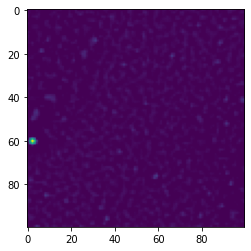

In [15]:
plt.imshow((x_train[5][0]))

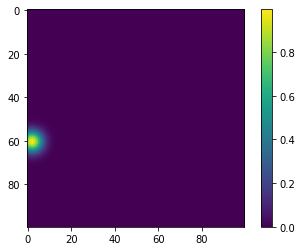

In [16]:
plt.imshow(y_train[5][0])
plt.colorbar()

In [35]:
image = y_train[1][0].reshape(100, 100)

image>0.8

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [36]:
#x_train = x_train[[np.sum(np.sum(i[0]))>1 for i in y_train.reshape(4000,4,100,100)]]
#y_train = y_train[[np.sum(np.sum(i[0]))>1 for i in y_train.reshape(4000,4,100,100)]]

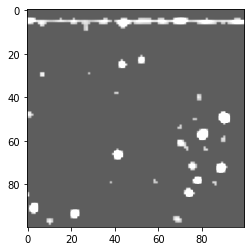

In [37]:
imshow(x_train[1501][3])

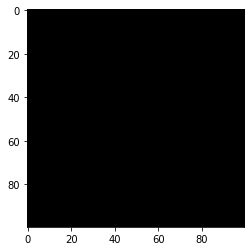

In [38]:
imshow(y_train[1501][0])

In [178]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\shawn\.conda\envs\tf\lib\site-packages\tensorflow\python\client\session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [23]:
# Construct the input layer with no definite frame size.
shape = (100, 100, 1)
inp = layers.Input(shape=(None, *shape))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(10, 10),
    padding="same",
    return_sequences=True,
    activation="softmax",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(10, 10),
    padding="same",
    return_sequences=True,
    activation="softmax",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=90,
    kernel_size=(10,10),
    padding="same",
    return_sequences=True,
    activation="softmax",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=90,
    kernel_size=(10, 10),
    padding="same",
    return_sequences=True,
    activation="softmax",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(5, 5, 5), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [134]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(5,5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=90,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=90,
    kernel_size=(1,1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3,3,3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [135]:
#model = keras.models.load_model('Adam-100,90,90-NEXT_ACT-BIG-(7-7).h5')

In [136]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=100)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100)

# Define modifiable training hyperparameters.
epochs = 2
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
    
    
)#, batch_size=batch_size,,callbacks=[early_stopping, reduce_lr]

Epoch 1/2
 168/2400 [=>............................] - ETA: 9:04 - loss: 0.0484

KeyboardInterrupt: 

# Super FAST

In [65]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3,3,3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [66]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=100)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100)

# Define modifiable training hyperparameters.
epochs = 2
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
    
    
)#, batch_size=batch_size,,callbacks=[early_stopping, reduce_lr]

Epoch 1/2
2400/2400 [==============================] - 312s 129ms/step - loss: 0.0280 - val_loss: 0.0249
Epoch 2/2
2400/2400 [==============================] - 305s 127ms/step - loss: 0.0247 - val_loss: 0.0241


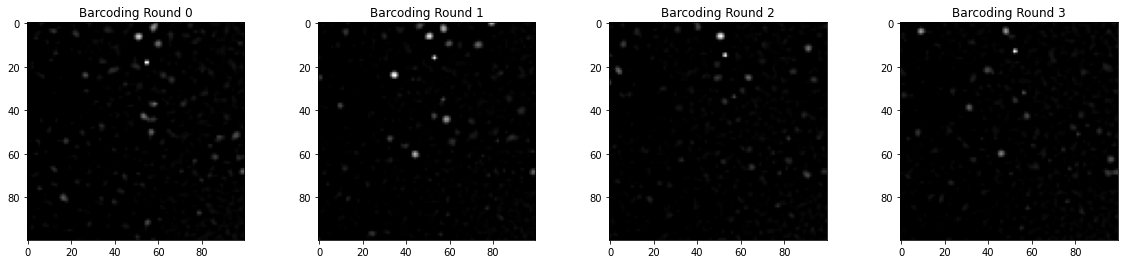

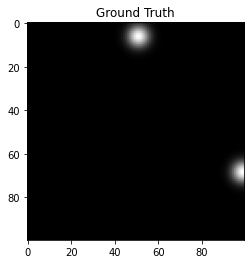

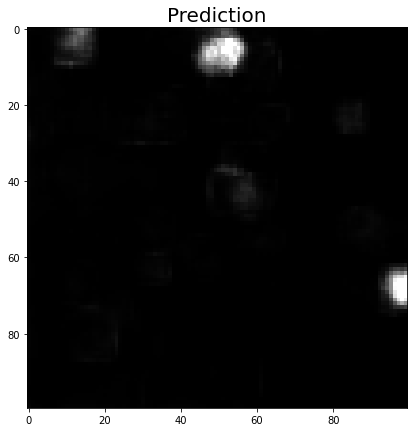

In [72]:
index_to_run = 6
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    #ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray",vmin=0,vmax=1)
axes.set_title(f"Ground Truth")
#axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray',vmin=0,vmax=0.5)
#plt.axis("off")

# Middle of the Way

In [63]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3,3,3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=100)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100)

# Define modifiable training hyperparameters.
epochs = 2
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
    
    
)#, batch_size=batch_size,,callbacks=[early_stopping, reduce_lr]

In [ ]:
index_to_run = 0
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    #ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray",vmin=0,vmax=1)
axes.set_title(f"Ground Truth")
#axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray',vmin=0,vmax=0.5)
#plt.axis("off")

# Kind of FAST

In [39]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3,3,3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [40]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=100)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100)

# Define modifiable training hyperparameters.
epochs = 2
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
    
    
)#, batch_size=batch_size,,callbacks=[early_stopping, reduce_lr]

Epoch 1/2
2400/2400 [==============================] - 642s 266ms/step - loss: 0.0250 - val_loss: 0.0227
Epoch 2/2
2400/2400 [==============================] - 644s 268ms/step - loss: 0.0230 - val_loss: 0.0234


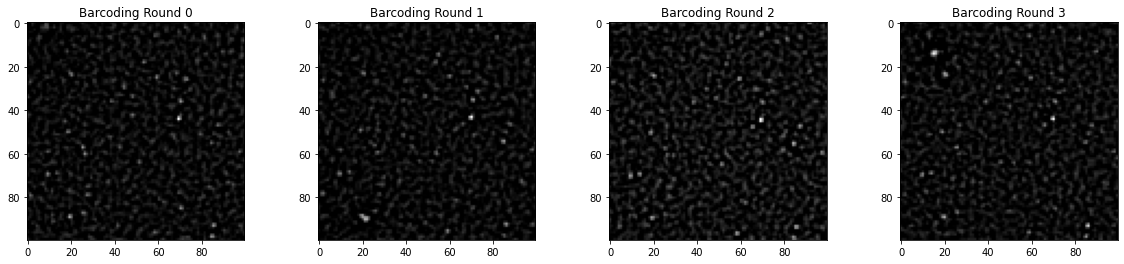

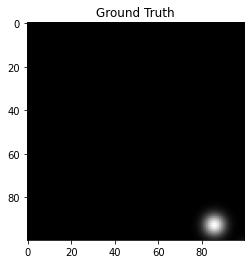

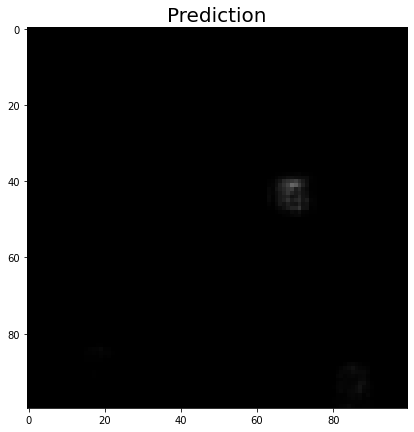

In [41]:
index_to_run = 0
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    #ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray",vmin=0,vmax=1)
axes.set_title(f"Ground Truth")
#axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray',vmin=0,vmax=0.5)
#plt.axis("off")

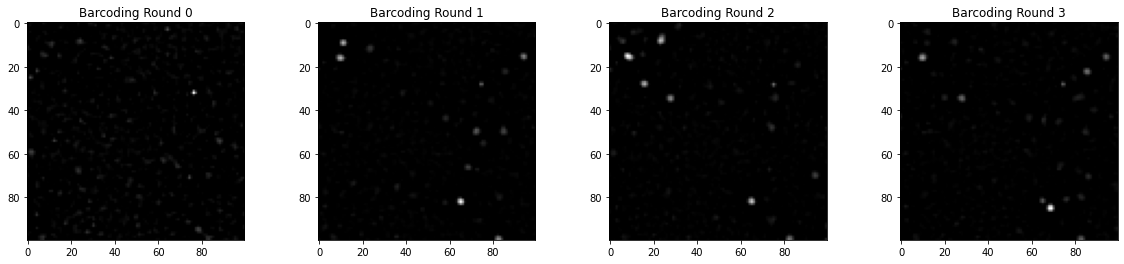

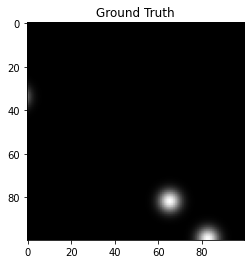

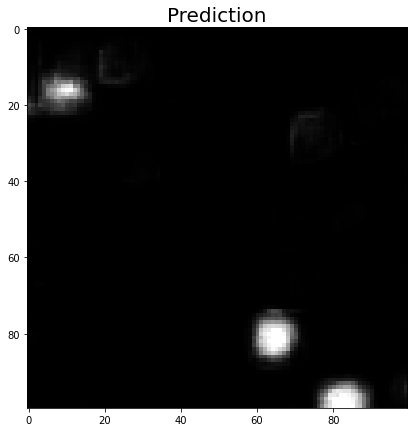

In [42]:
index_to_run = 1
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    #ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray",vmin=0,vmax=1)
axes.set_title(f"Ground Truth")
#axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray',vmin=0,vmax=0.5)
#plt.axis("off")

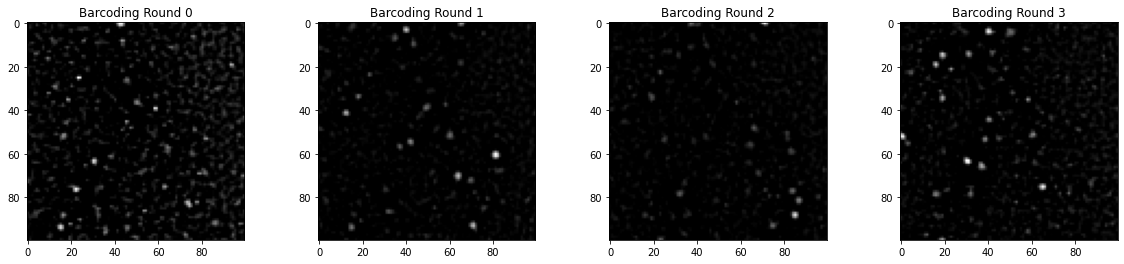

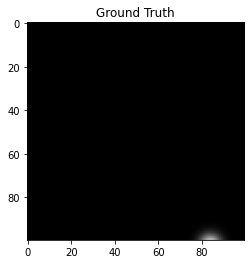

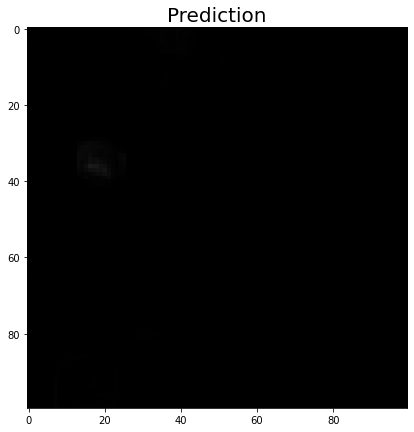

In [43]:
index_to_run = 2
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    #ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray",vmin=0,vmax=1)
axes.set_title(f"Ground Truth")
#axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray',vmin=0,vmax=0.5)
#plt.axis("off")

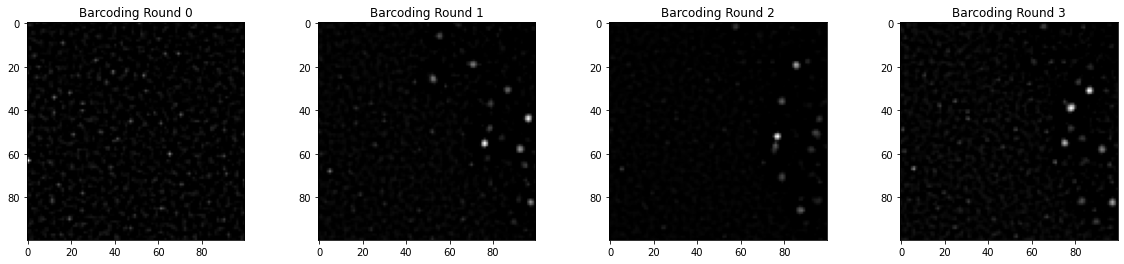

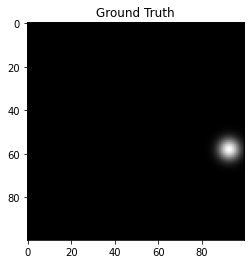

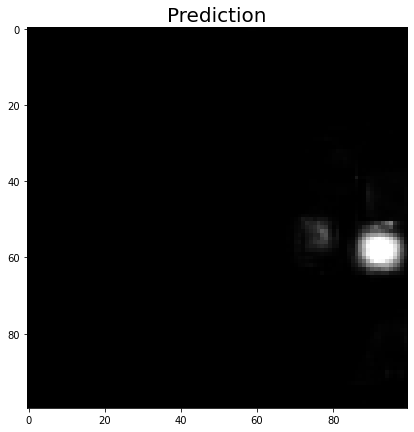

In [62]:
index_to_run = 21

fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    #ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray",vmin=0,vmax=1)
axes.set_title(f"Ground Truth")
#axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray',vmin=0,vmax=0.5)
#plt.axis("off")

# Slow But Better

# Old One

In [108]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(5,5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(5,5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=90,
    kernel_size=(5,5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=90,
    kernel_size=(5,5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3,3,3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [109]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=100)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100)

# Define modifiable training hyperparameters.
epochs = 2
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
    
    
)#, batch_size=batch_size,,callbacks=[early_stopping, reduce_lr]

Epoch 1/2
 115/2400 [>.............................] - ETA: 18:41 - loss: 0.0452

KeyboardInterrupt: 

In [132]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(5,5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(5,5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=100,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3,3,3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [133]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=100)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100)

# Define modifiable training hyperparameters.
epochs = 2
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_data=(x_val, y_val),
    batch_size=batch_size
    
    
)#, batch_size=batch_size,,callbacks=[early_stopping, reduce_lr]

Epoch 1/2
 149/2400 [>.............................] - ETA: 23:06 - loss: 0.0480

KeyboardInterrupt: 

In [62]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

(-0.5, 63.5, 63.5, -0.5)

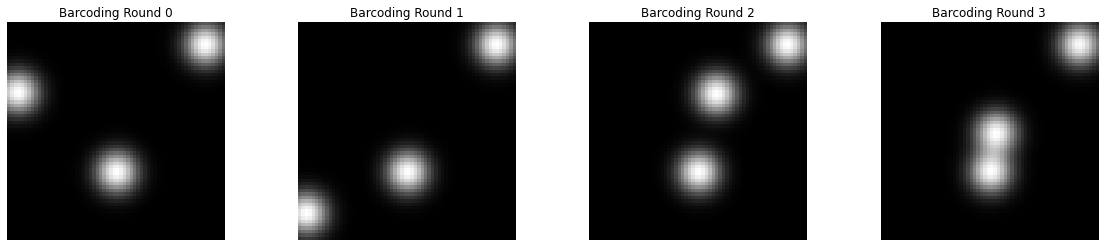

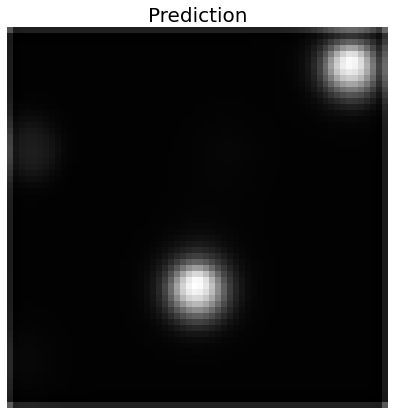

In [270]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4500][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")


plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4500], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 63.5, 63.5, -0.5)

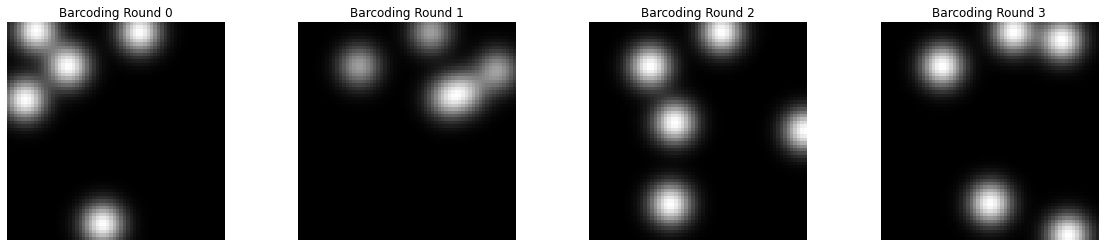

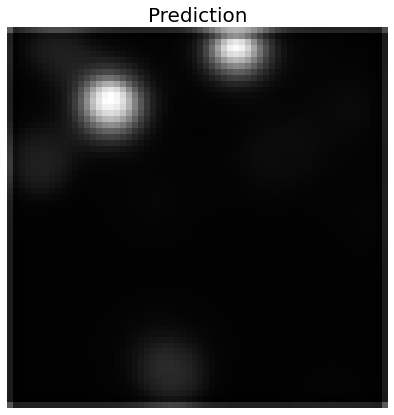

In [286]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4601][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")


plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4601], axis=0))[0][3],cmap='gray')
plt.axis("off")

In [343]:
ground_truth.shape

(5000, 4, 128, 128, 1)

# Trained on 100 gold-standard image sets

(-0.5, 99.5, 99.5, -0.5)

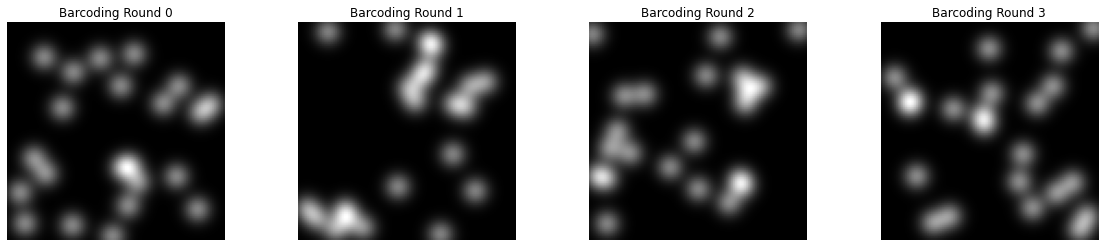

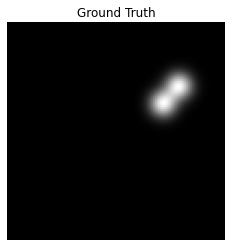

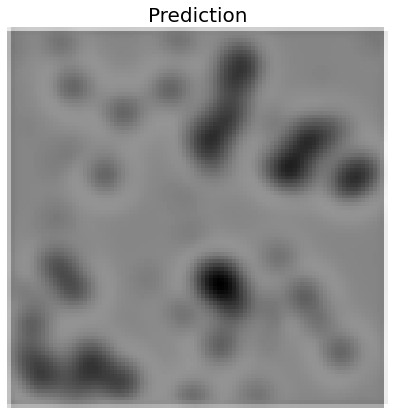

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4600][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(ground_truth[4600][idx]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4600], axis=0))[0][3],cmap='gray')
plt.axis("off")

# Trained on 1000 gold-standard image sets

(-0.5, 99.5, 99.5, -0.5)

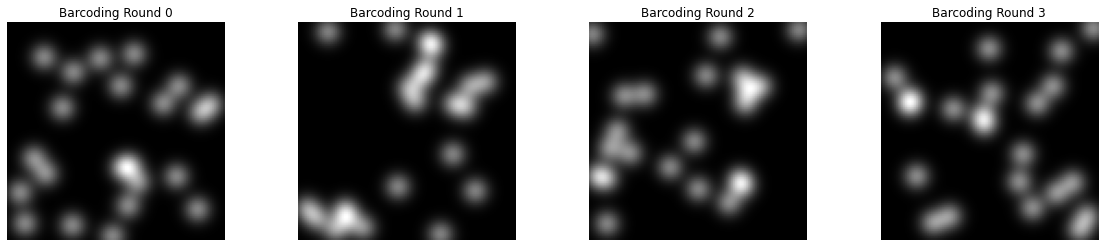

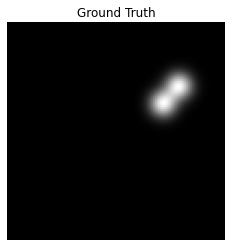

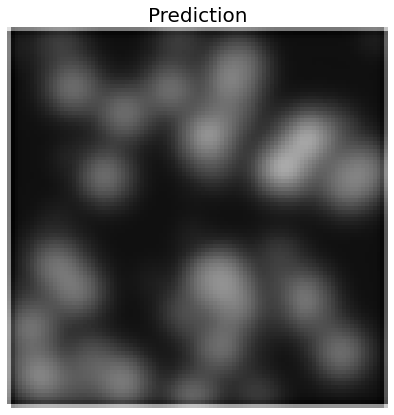

In [69]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4600][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(ground_truth[4600][idx]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4600], axis=0))[0][3],cmap='gray')
plt.axis("off")

# Trained on 4000 gold-standard image sets

(-0.5, 99.5, 99.5, -0.5)

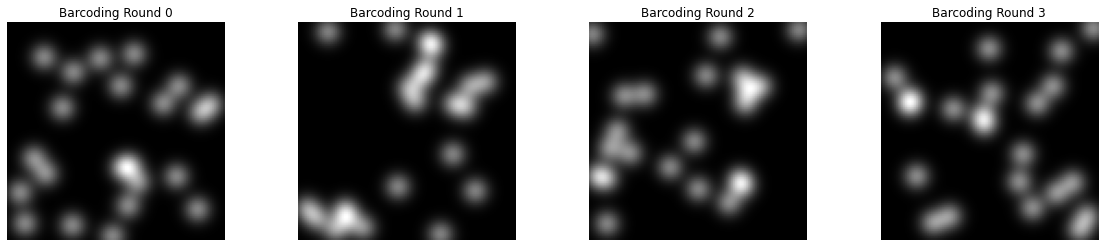

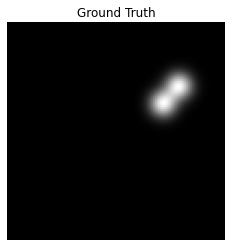

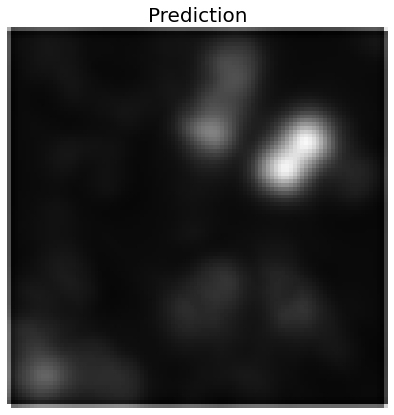

In [74]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4600][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(ground_truth[4600][idx]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4600], axis=0))[0][3],cmap='gray')
plt.axis("off")

# Trained on 4000 gold-standard image sets
# With validation data supplied, batch size set to 5


(-0.5, 99.5, 99.5, -0.5)

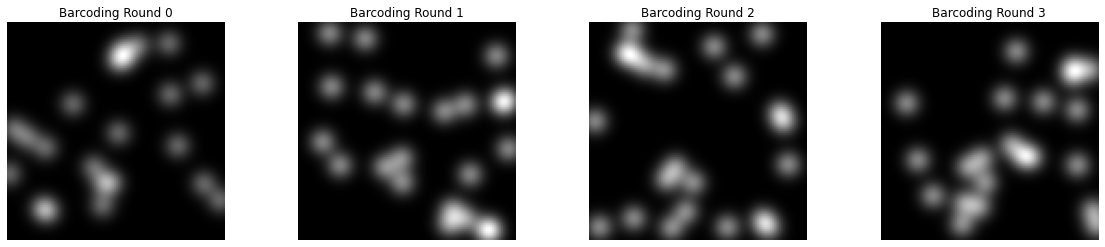

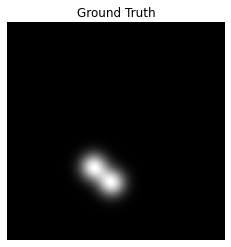

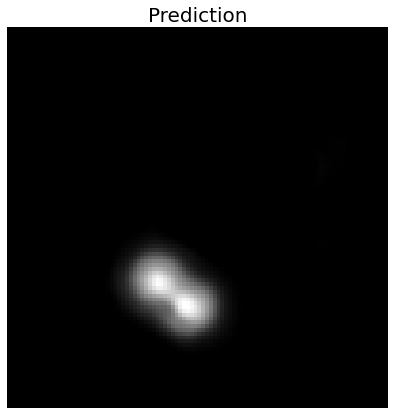

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4502][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(ground_truth[4502][idx]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4502], axis=0))[0][3],cmap='gray')
plt.axis("off")

# Trained on 4000 gold-standard image sets
# With validation data supplied, batch size set to 5
# Filter ConvLSTM2D: 100, 90, 85

(-0.5, 99.5, 99.5, -0.5)

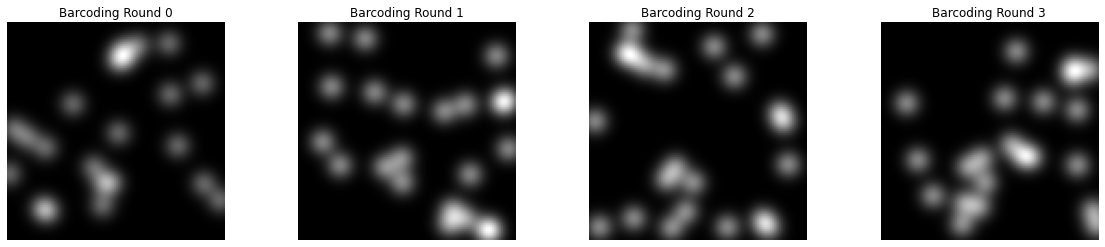

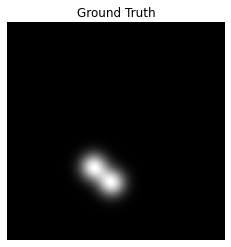

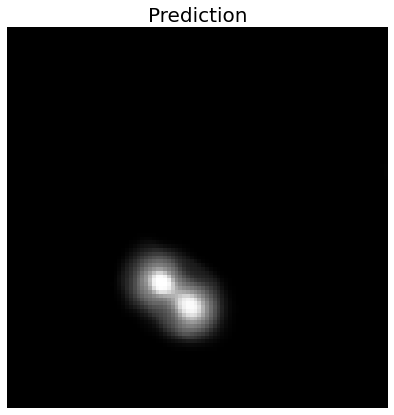

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4502][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(ground_truth[4502][idx]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4502], axis=0))[0][3],cmap='gray')
plt.axis("off")

# Trained on 4000 gold-standard image sets
# With validation data supplied, batch size set to 5
# Filter ConvLSTM2D: 200, 150, 100

(-0.5, 99.5, 99.5, -0.5)

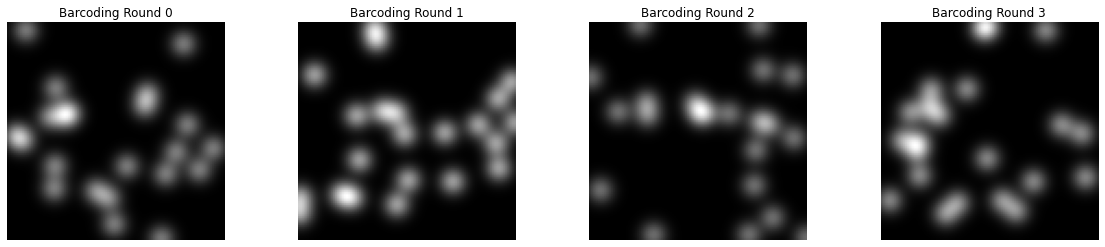

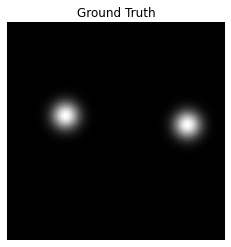

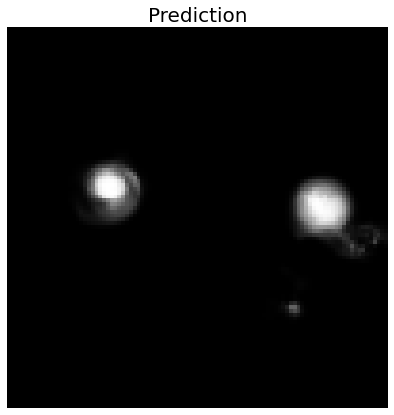

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4502][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(ground_truth[4502][idx]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4502], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

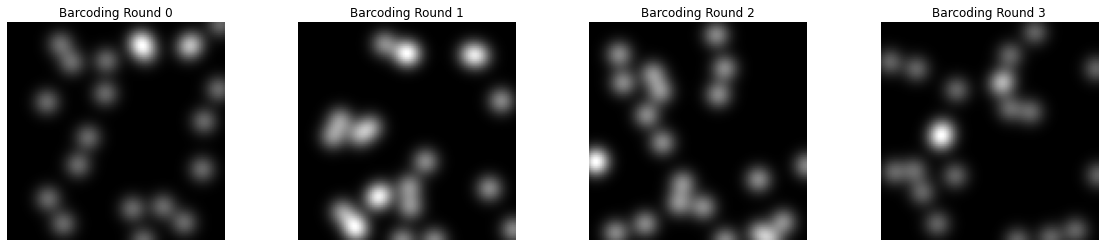

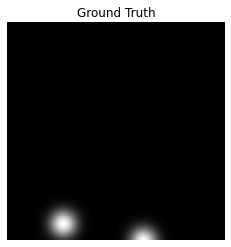

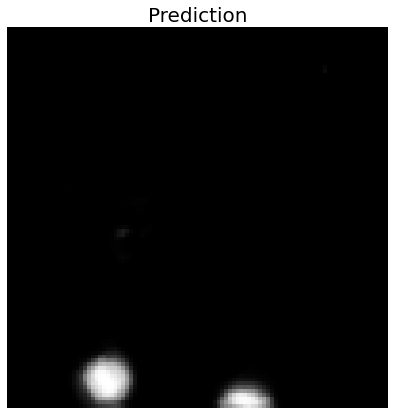

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4505][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(ground_truth[4505][idx]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4505], axis=0))[0][3],cmap='gray')
plt.axis("off")

# Trained on 4000 gold-standard image sets
# With validation data supplied, batch size set to 5
# Filter ConvLSTM2D: 100, 90, 85

(-0.5, 99.5, 99.5, -0.5)

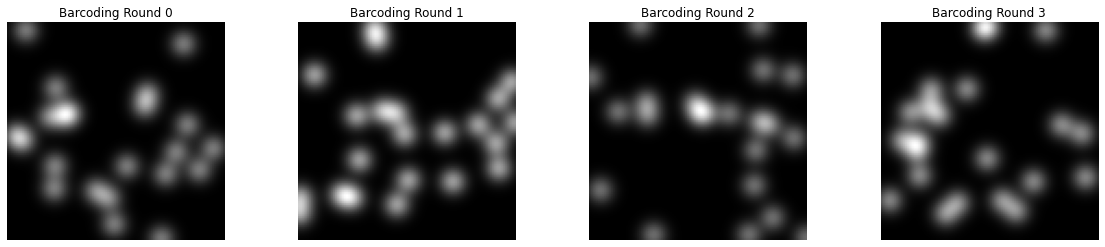

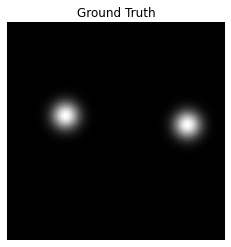

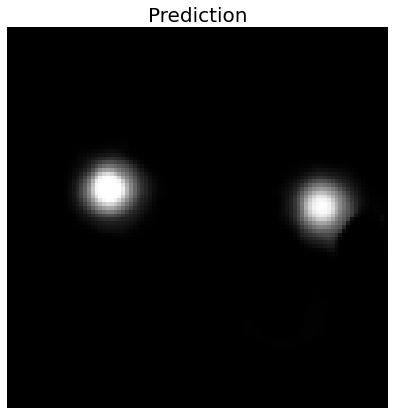

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4502][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(ground_truth[4502][idx]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4502], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

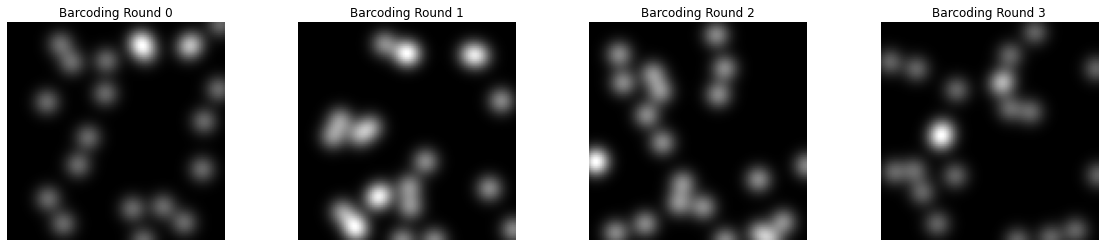

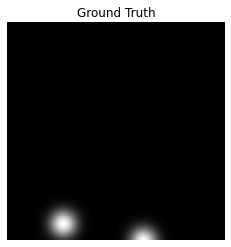

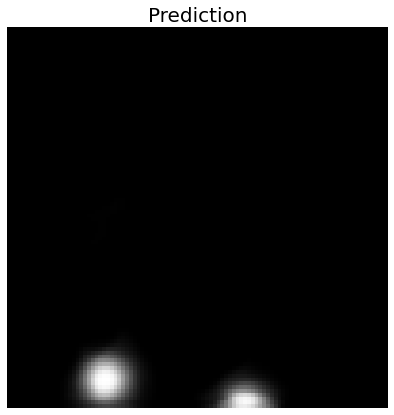

In [34]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4505][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(ground_truth[4505][idx]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4505], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

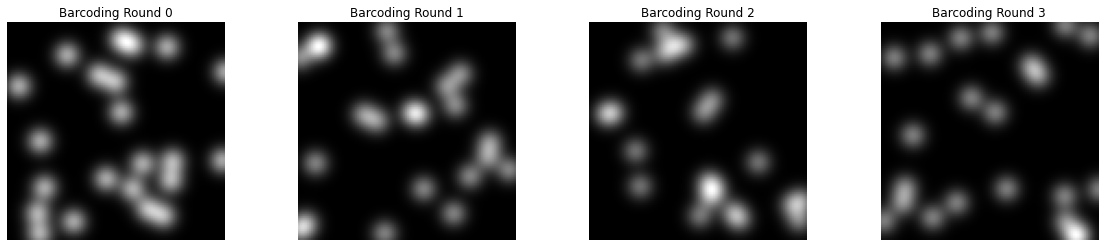

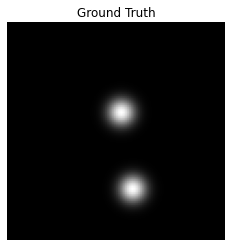

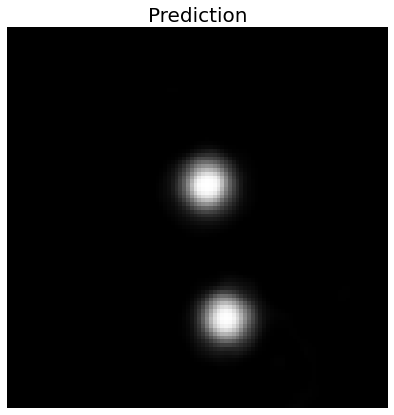

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(dot_sets[4600][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(ground_truth[4600][idx]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(dot_sets[4600], axis=0))[0][3],cmap='gray')
plt.axis("off")

In [37]:
#model.save('Adam-100,90,85.h5')

# Real Data!!!

In [153]:
#model.save('Adam-100,90,85-REAL.h5')

(-0.5, 99.5, 99.5, -0.5)

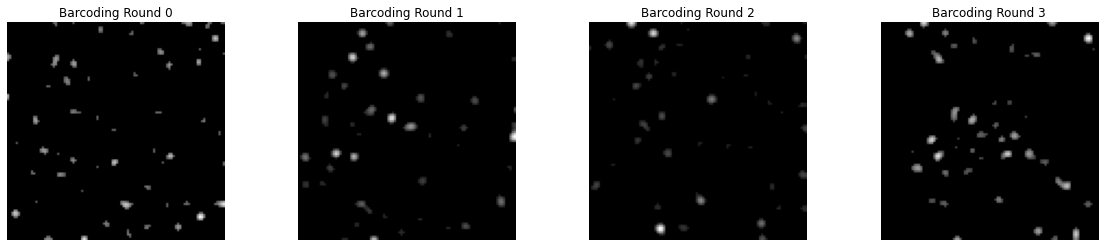

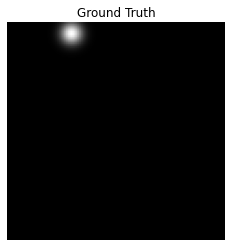

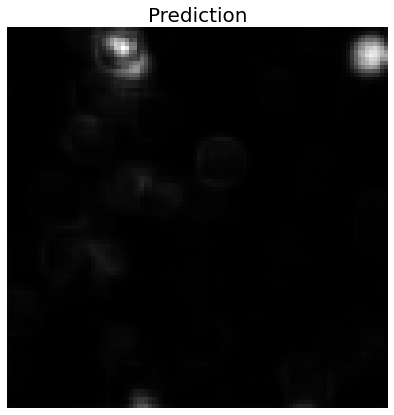

In [151]:
index_to_run = 60
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

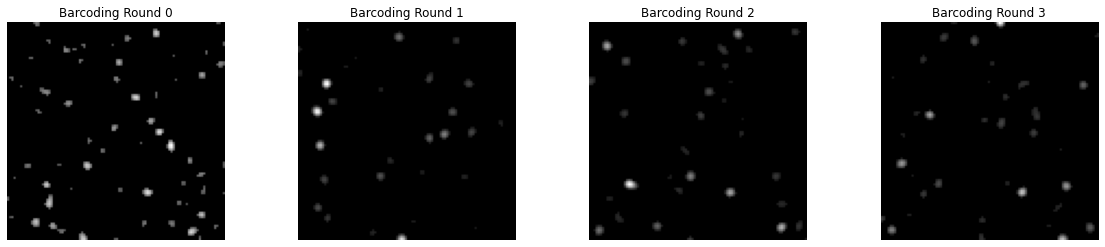

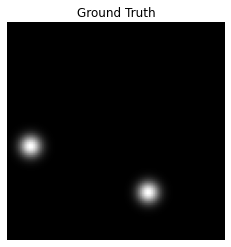

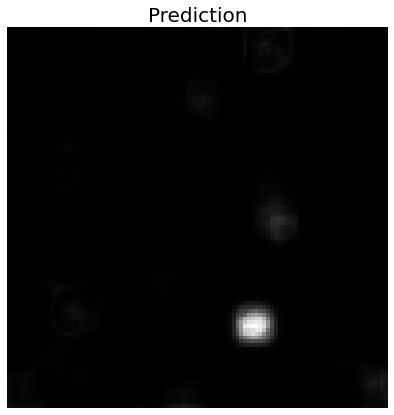

In [161]:
index_to_run = 90
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

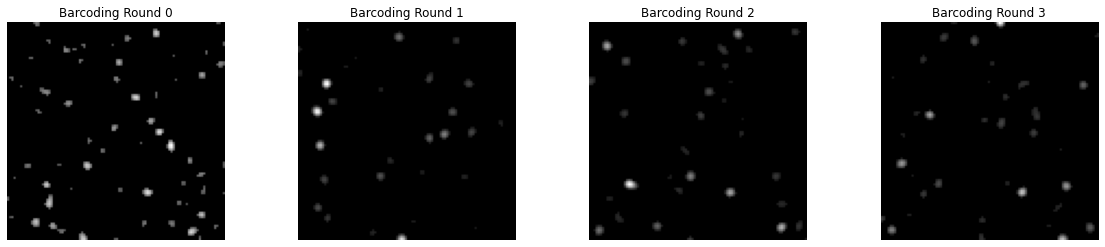

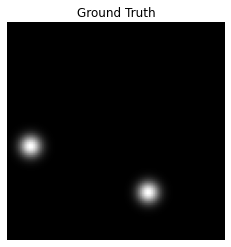

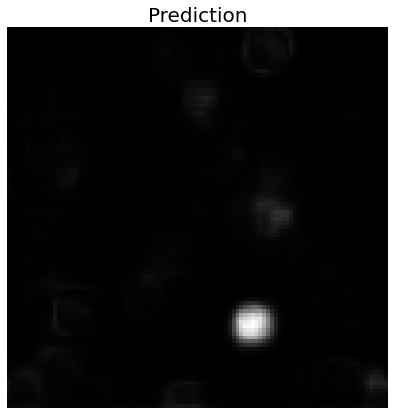

In [152]:
index_to_run = 90
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray')
plt.axis("off")

# Trained on Real Data
# With validation data supplied, batch size set to 5
# Filter ConvLSTM2D: 200, 150, 100

In [197]:
#model.save('Adam-200,150,100-REAL.h5')

In [193]:
#[np.sum(y_val[i][0].reshape(100,100)) for i in np.arange(100)]

(-0.5, 99.5, 99.5, -0.5)

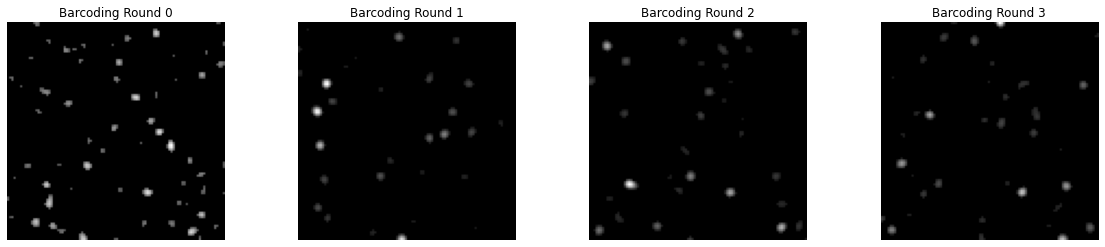

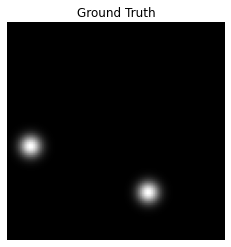

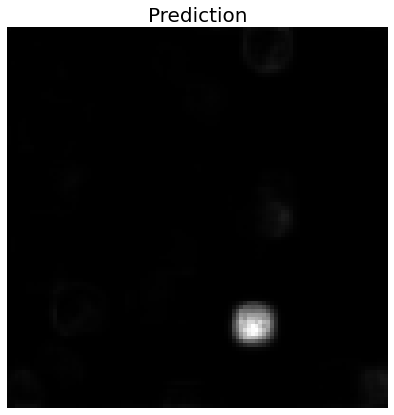

In [168]:
index_to_run = 90
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

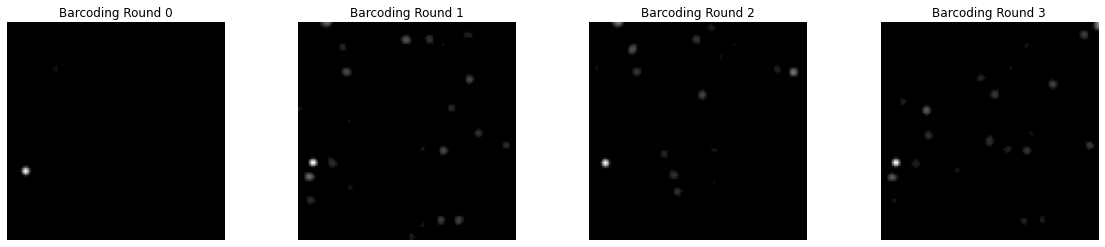

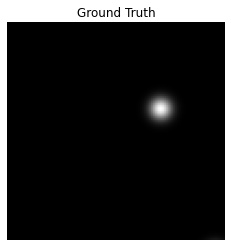

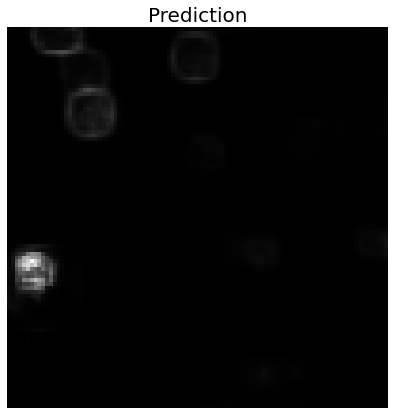

In [167]:
index_to_run = 100
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

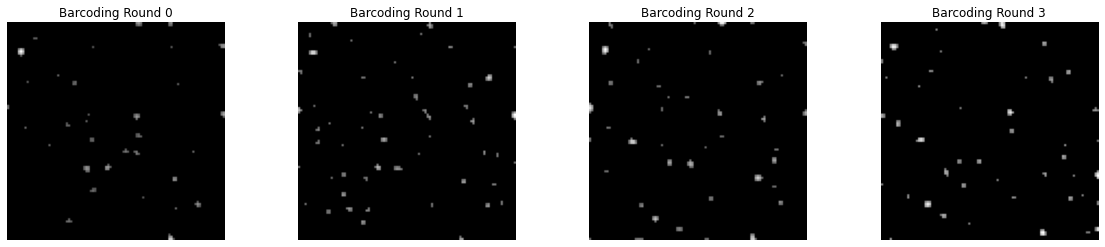

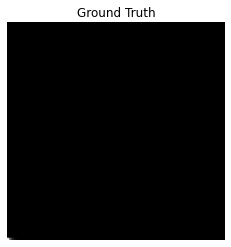

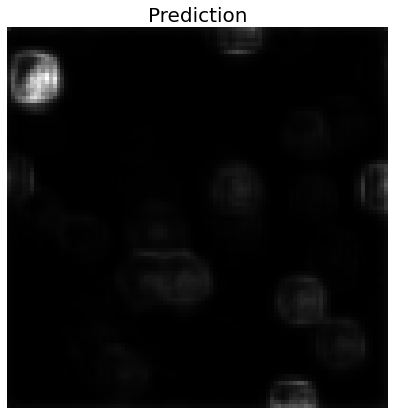

In [189]:
index_to_run = 0
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

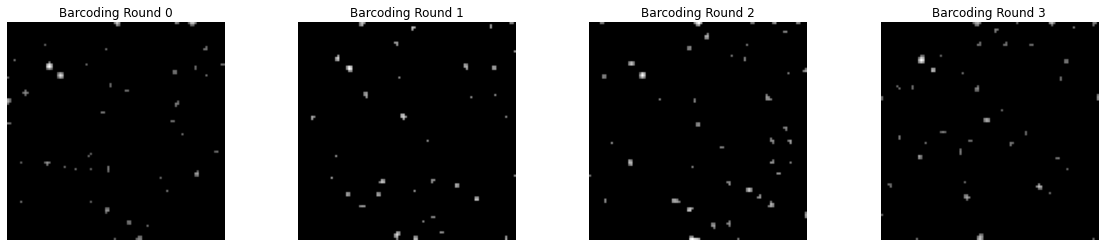

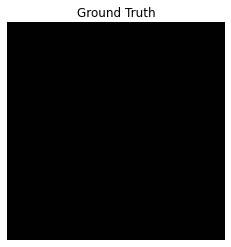

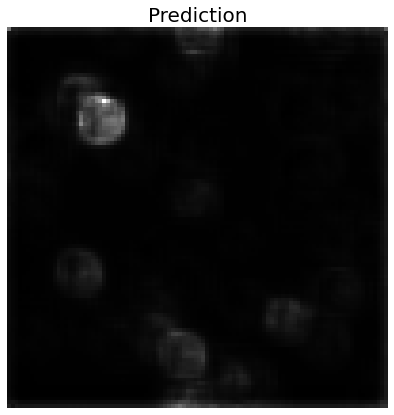

In [190]:
index_to_run = 1
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

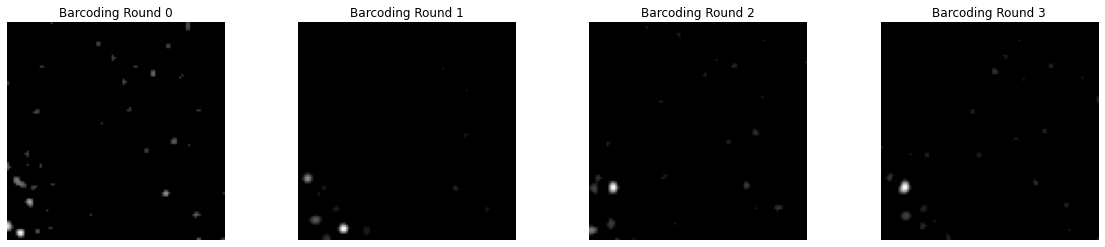

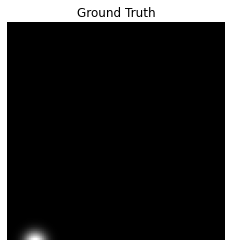

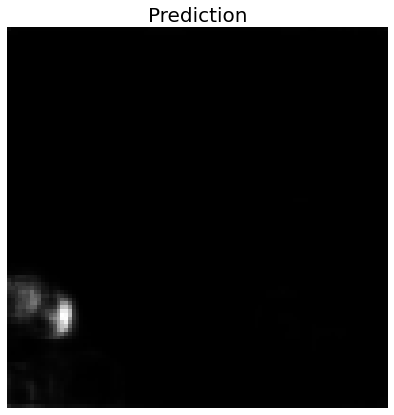

In [195]:
index_to_run = 3
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

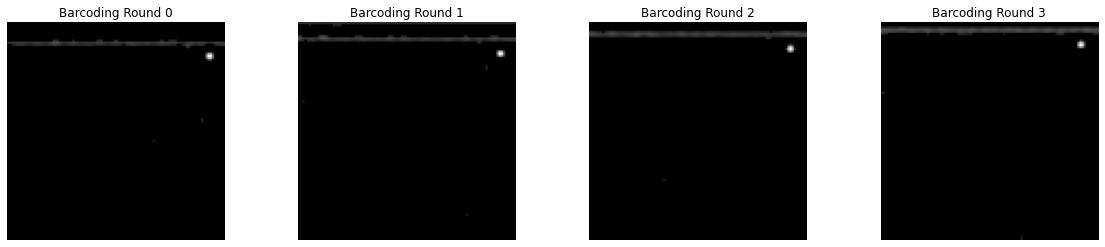

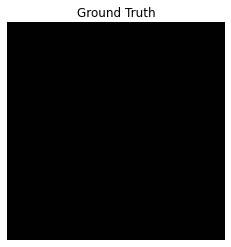

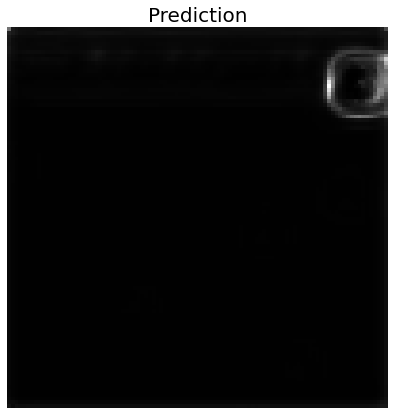

In [194]:
index_to_run = 19
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray')
plt.axis("off")

# Trained on Real Data
# With validation data supplied, batch size set to 2
# Filter ConvLSTM2D: 200, 150, 100

(-0.5, 99.5, 99.5, -0.5)

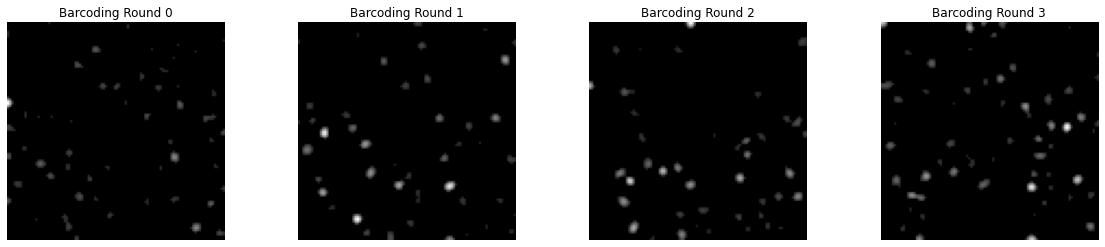

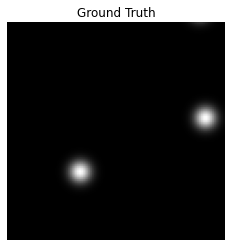

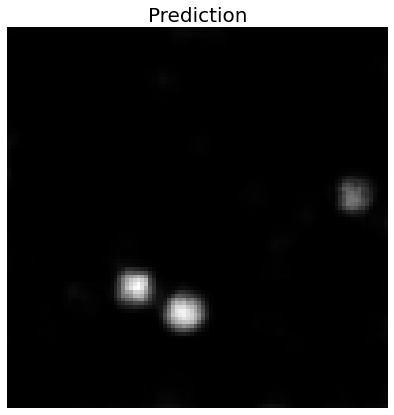

In [43]:
index_to_run = 0
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray')
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

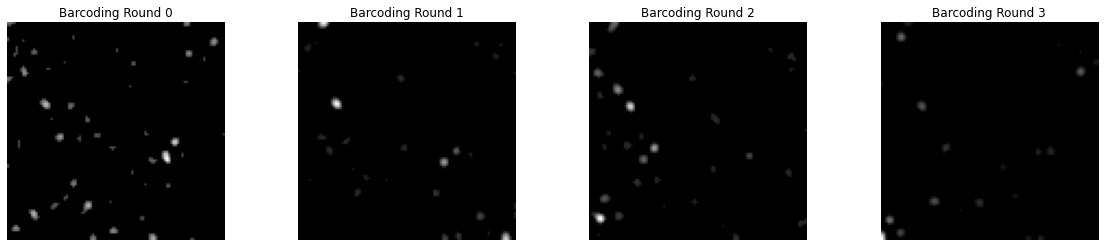

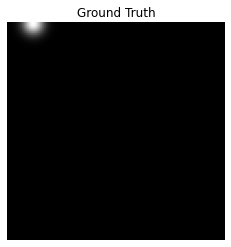

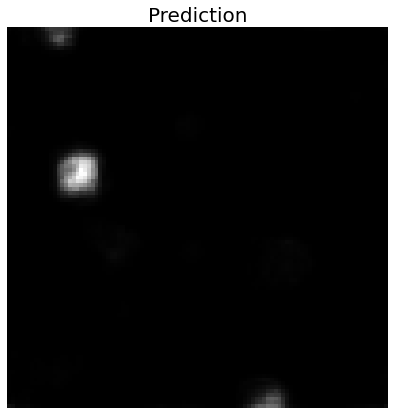

In [45]:
index_to_run = 2
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray')
plt.axis("off")

# Trained on Real Data
# With validation data supplied, batch size set to 2
# Filter ConvLSTM2D: 100,90,85
# 10% of all dims included

In [82]:
model.save('train-10%OfDim/Adam-100,90,85-REAL.h5')

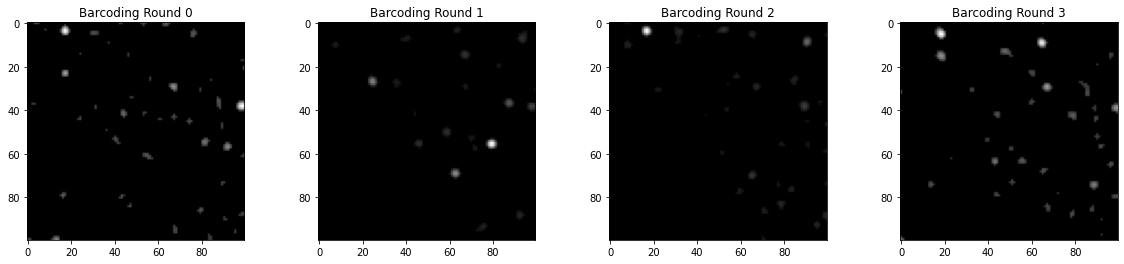

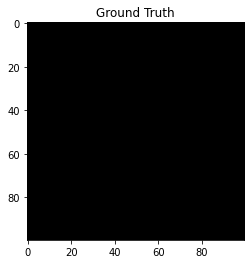

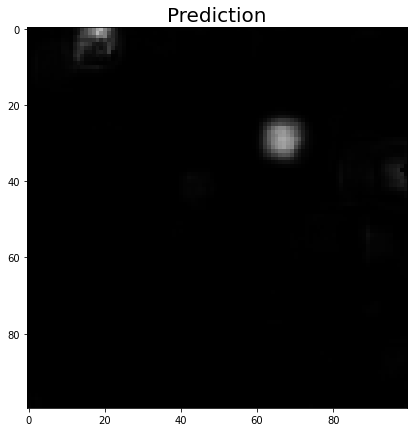

In [96]:
index_to_run = 40
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    #ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray",vmin=0,vmax=1)
axes.set_title(f"Ground Truth")
#axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],cmap='gray',vmin=0,vmax=0.5)
#plt.axis("off")

# More granularity preserved in pre processing
# Bigger neural net

model_old = keras.models.load_model('Adam-100,90,85-BIGBRAIN_LOTS_TRAINING-OLD.h5')
model_new = keras.models.load_model('Adam-100,90,85-BIGBRAIN_LOTS_TRAINING-AGAIN.h5')
model_new = keras.models.load_model('Adam-100,90,85-BIGBRAIN_LOTS_TRAINING-AGAIN.h5')

(-0.5, 99.5, 99.5, -0.5)

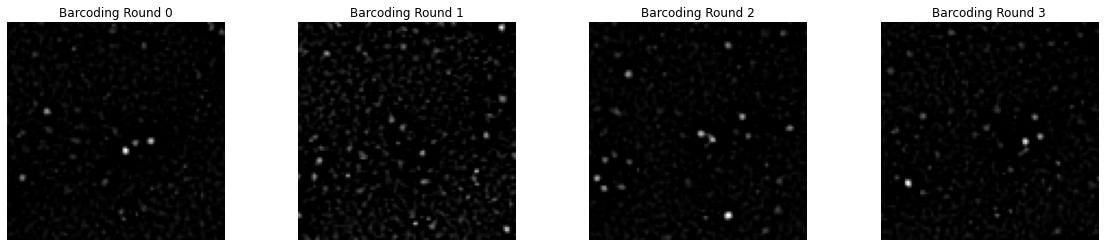

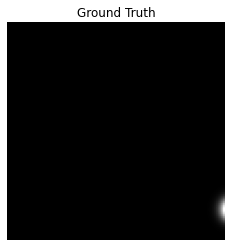

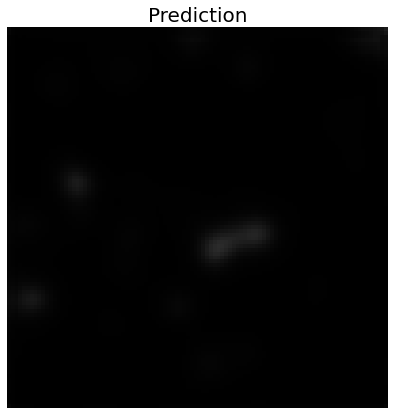

In [77]:
index_to_run = 3
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray")
axes.set_title(f"Ground Truth")
axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
plt.imshow(model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3],vmin=0,vmax=0.5,cmap='gray')
plt.axis("off")


In [21]:
from scipy.ndimage import gaussian_filter
def process_img(input_img):
    img = input_img.reshape(100,100)
    img_p = gaussian_filter(((img)- np.mean((img).flatten()))/np.std((img).flatten()),sigma=1.5)-gaussian_filter(((img)- np.mean((img).flatten()))/np.std((img).flatten()),sigma=4)
    img_p[img_p<0.5]= 0
    return img_p.reshape(100,100,1)

In [91]:
img = x_val[6][1].reshape(100,100)

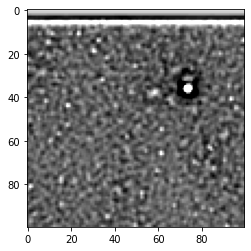

In [92]:
imshow(img)

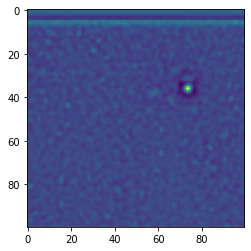

In [94]:
plt.imshow(img)

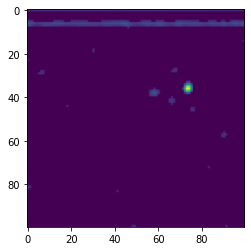

In [95]:
img_p = gaussian_filter(((img)- np.mean((img).flatten()))/np.std((img).flatten()),sigma=1.5)-gaussian_filter(((img)- np.mean((img).flatten()))/np.std((img).flatten()),sigma=4)
img_p[img_p<0.5] = 0
plt.imshow(img_p)

(array([1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 5.000e+00,
        1.000e+00, 4.000e+00, 1.000e+01, 9.000e+00, 1.600e+01, 1.300e+01,
        1.100e+01, 3.300e+01, 6.400e+01, 3.500e+01, 6.500e+01, 1.840e+02,
        1.010e+02, 1.520e+02, 4.090e+02, 3.030e+02, 7.420e+02, 4.830e+02,
        5.650e+02, 1.372e+03, 7.560e+02, 7.000e+02, 1.429e+03, 6.290e+02,
        4.820e+02, 6.590e+02, 2.110e+02, 1.290e+02, 1.670e+02, 4.800e+01,
        3.400e+01, 3.700e+01, 1.700e+01, 4.000e+00, 1.600e+01, 1.000e+01,
        1.400e+01, 4.000e+00, 7.000e+00, 7.000e+00, 4.000e+00, 2.000e+00,
        6.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+0

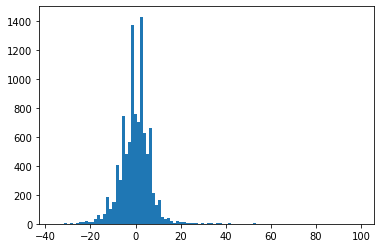

In [57]:
plt.hist((img).flatten() - np.mean((img).flatten()),bins= 100)

In [437]:
preds = [model.predict(np.expand_dims(x_val[i], axis=0)) for i in np.arange(90)]

In [93]:
from photutils.detection import DAOStarFinder


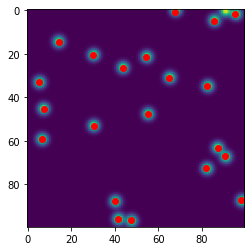

In [113]:
daofind = DAOStarFinder(fwhm=6.0, threshold=0.5)  
sources = daofind(dot_sets[8][2].reshape(100,100))

plt.scatter(sources['xcentroid'], sources['ycentroid'],c='red')

plt.imshow(dot_sets[8][2])

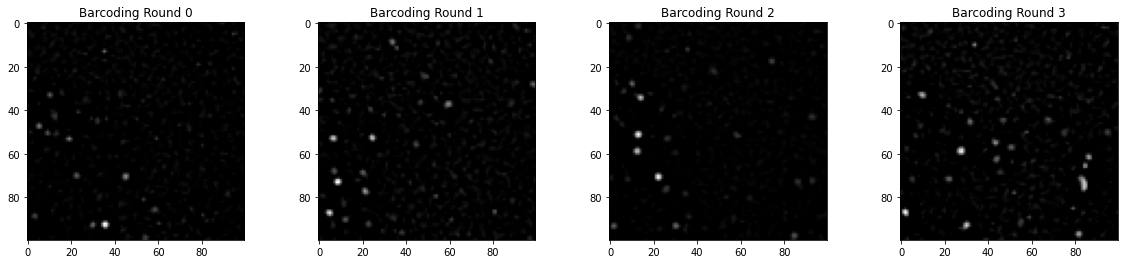

In [ ]:
index_to_run = 3
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(x_val[index_to_run][idx]), cmap="gray")
    ax.set_title(f"Barcoding Round {idx}")
    #ax.axis("off")

fig, axes = plt.subplots(1, 1, figsize=(20, 4))

# Plot the original frames.
axes.imshow(np.squeeze(y_val[index_to_run][3]), cmap="gray",vmin=0,vmax=1)
axes.set_title(f"Ground Truth")
#axes.axis("off")
    
plt.figure(figsize=(7,7))
plt.tight_layout()

plt.title('Prediction',fontsize=20)
pred = model.predict(np.expand_dims(x_val[index_to_run], axis=0))[0][3]
plt.imshow(pred,cmap='gray')
daofind = DAOStarFinder(fwhm=10.0, threshold=0.5)  
sources = daofind(pred.reshape(100,100))

plt.scatter(sources['xcentroid'], sources['ycentroid'],c='red')
#plt.axis("off")

In [116]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float32,float64,int32,float64,float64,float64,float64
1,7.389612594963563,17.758306234072958,0.5125525535368254,0.041879587,0.08614214519178286,169,0.0,0.2006303369998932,1.013887882232666,-0.014974831231423888
2,57.68861826965241,27.730553605589527,0.4591919339197816,-0.08646493,0.04035939337263334,169,0.0,0.9228308200836182,4.962482929229736,-1.7392475645392238
3,64.26585901634277,37.51250835762831,0.516779461794035,-0.019936744,-0.08320159778341249,169,0.0,0.8298621773719788,4.215346336364746,-1.5620831560572623
4,24.981158683113435,97.02389220275586,0.47430329262149806,-0.3116433,-0.6090364086287786,169,0.0,0.3110617995262146,1.9184784889221191,-0.7073923350088924


In [105]:
pred.reshape(100,100)[]

array([[0.27180657, 0.18881766, 0.19106962, ..., 0.00183542, 0.00273654,
        0.00445833],
       [0.23136596, 0.17568439, 0.15891117, ..., 0.00145326, 0.00215202,
        0.00323557],
       [0.21310645, 0.1659416 , 0.13565394, ..., 0.00078148, 0.00139457,
        0.00172071],
       ...,
       [0.00062087, 0.0003765 , 0.00061679, ..., 0.00346901, 0.00289637,
        0.00333226],
       [0.00089947, 0.00049848, 0.00044085, ..., 0.00367133, 0.00339264,
        0.0032283 ],
       [0.00186039, 0.00160331, 0.00156489, ..., 0.00655701, 0.00652576,
        0.00694776]], dtype=float32)